#  **Data Cleaning**

In [741]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [742]:
df = pd.read_csv('../../data/raw/laptop_data.csv')

In [743]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [745]:
df.isnull().sum() #Check sum of null values

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [746]:
df.shape

(3976, 18)

In [747]:
df = df.drop(columns=['Unnamed: 0'])#Remove Unnamed column


In [748]:
df[df.duplicated()]

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
2867,Lenovo,Lenovo Ideapad 3 15ITL6 (82H801L7IN) Laptop (1...,33900,Intel Core i3 (11th Gen),Intel,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
3018,HP,HP 15s-du1044tu (18N71PA) Laptop (15.6 Inch | ...,22071,Intel Celeron Dual-Core,Intel,Not Expandable,4 GB,DDR4 RAM,1.1 Ghz Processor,LED,15.6,UHD 600,Intel,NO SSD,1024 GB HDD Storage,46,46W Adapter
3104,Acer,Acer Aspire 5 A514-53 (NX.HZ6SI.001) Laptop (1...,27775,Intel Core i3 (10th Gen),Intel,12 GB Expandable,4 GB,DDR4 RAM,1.2 Ghz Processor,LED,14,UHD,Intel,512 GB SSD Storage,No HDD,48,Upto 11 Hrs Battery Life
3321,Lenovo,Lenovo Ideapad Gaming 3 15ACH6 (82K200X3IN) La...,81990,AMD Octa-Core Ryzen 7,AMD,16 GB Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 5 Hrs Battery Life


In [749]:
df = df.drop_duplicates() #Remove duplicates columns

In [750]:
df.shape

(3972, 17)

In [751]:
print(f"Number of unique Brands: {df['Brand'].nunique()}\n") 
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique Brand type: {df['Brand'].value_counts()}")

Number of unique Brands: 31

Unique Values: ['HP' 'Lenovo' 'Dell' 'Infinix' 'Acer' 'ASUS' 'Tecno' 'Xiaomi' 'MSI'
 'Samsung' 'Apple' 'Realme' 'AVITA' 'Zebronics' 'Honor' 'Fujitsu' 'Wings'
 'LG' 'Gigabyte' 'Microsoft' 'Razer' 'Coconics' 'Huawei' 'Micromax'
 'iball' 'Lava' 'VAIO' 'Smartron' 'Colorful' 'Nokia' 'RDP']

Value count for each unique Brand type: Brand
ASUS         989
Lenovo       809
HP           802
Dell         420
Acer         321
MSI          316
Samsung       61
Apple         49
Infinix       39
Microsoft     34
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64


## **Clean each feature**

### Brand

In [752]:
#Clean Brand column
df['Brand'] = df['Brand'].astype('category')
brand_counts = df['Brand'].value_counts()
rare_brands = brand_counts[brand_counts < 40].index
df["Brand"] = df["Brand"].replace(rare_brands, "Other")

C:\Users\USER\AppData\Local\Temp\ipykernel_12748\1398493072.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Brand"] = df["Brand"].replace(rare_brands, "Other")


In [753]:
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique Brand type: {df['Brand'].value_counts()}")

Unique Values: ['HP', 'Lenovo', 'Dell', 'Other', 'Acer', 'ASUS', 'MSI', 'Samsung', 'Apple']
Categories (9, object): ['ASUS', 'Other', 'Acer', 'Apple', ..., 'HP', 'Lenovo', 'MSI', 'Samsung']

Value count for each unique Brand type: Brand
ASUS       989
Lenovo     809
HP         802
Dell       420
Acer       321
MSI        316
Other      205
Samsung     61
Apple       49
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_12748\3943692356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby('Brand')['Price'].mean().sort_values()


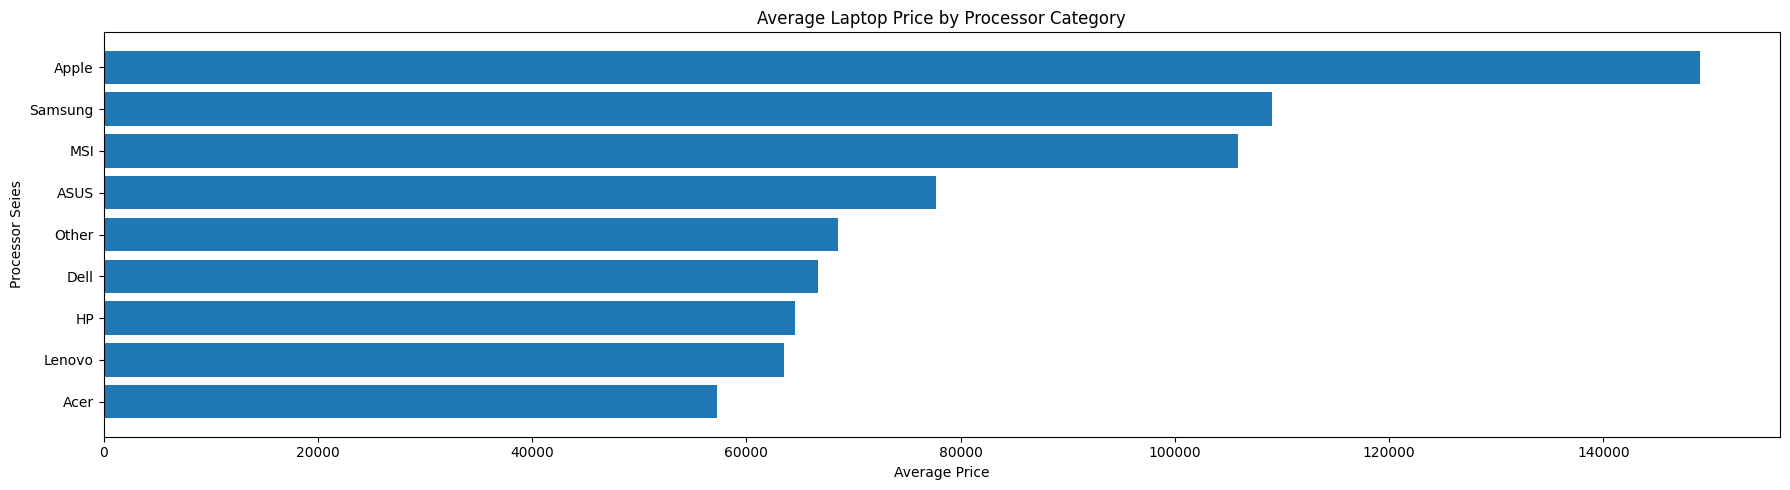

In [754]:
avg_price = df.groupby('Brand')['Price'].mean().sort_values()

plt.figure(figsize=(18,5))
plt.barh(avg_price.index, avg_price.values)   # horizontal bar chart
plt.xlabel("Average Price")
plt.ylabel("Processor Seies")
plt.title("Average Laptop Price by Processor Category")
plt.tight_layout()
plt.show()

### RAM Expandable

In [755]:
#Clean RAM_Expandable column
df['RAM_Expandable'] = df['RAM_Expandable'].str.rstrip('GB Expandable') # Remove unwanted characters
print(f"Unique Values: {df['RAM_Expandable'].unique()}\n")
df['RAM_Expandable'].value_counts()

Unique Values: ['Not' ' 12' ' 32' ' 8' ' 16' ' 4' ' 64' ' 48' ' 2' ' 10']



RAM_Expandable
Not    2156
 16     756
 32     537
 8      186
 12     158
 64     158
 4        9
 48       9
 2        2
 10       1
Name: count, dtype: int64

In [756]:
df['RAM_Expandable'] = df['RAM_Expandable'].apply(lambda x: 'No' if 'Not' in x else 'Yes')
df['RAM_Expandable'].value_counts()

RAM_Expandable
No     2156
Yes    1816
Name: count, dtype: int64

### RAM Size

In [757]:
#Clean RAM column
df['RAM'] = df['RAM'].str.extract('(\d+)').astype(int)
df.rename(columns={'RAM': 'RAM_Size (GB)'}, inplace=True)
print(f"Unique Values: {df['RAM_Size (GB)'].unique()}\n")

Unique Values: [ 4  8 16 32 18 64 12 36  2 24  6  3]



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\USER\AppData\Local\Temp\ipykernel_12748\1427822852.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['RAM'] = df['RAM'].str.extract('(\d+)').astype(int)


In [758]:
print(f"Value count for each unique RAM sizes: {df['RAM_Size (GB)'].value_counts()}")

Value count for each unique RAM sizes: RAM_Size (GB)
8     1803
16    1407
4      581
32     139
2       24
64       6
12       6
3        2
36       1
18       1
24       1
6        1
Name: count, dtype: int64


In [759]:
standard_ram_sizes = [4, 8, 16, 32]
df = df[df["RAM_Size (GB)"].isin(standard_ram_sizes)].reset_index(drop=True)

print(df["RAM_Size (GB)"].value_counts())

RAM_Size (GB)
8     1803
16    1407
4      581
32     139
Name: count, dtype: int64


In [760]:
df.shape

(3930, 17)

### Processor Brand

In [761]:
apple_df = df[df['Brand'] == 'Apple'][['Name','Brand', 'Processor_Brand','Ghz', 'Processor_Name']]
print(apple_df)

print(apple_df['Ghz'].value_counts())

                                                   Name  Brand  \
80    Apple MacBook Air M1 MGND3HN/A Ultrabook (13.3...  Apple   
82    Apple MacBook Air MQD32HN/A Ultrabook (13.3 In...  Apple   
96    Apple MacBook Air M2 MLXY3HN/A Ultrabook (13.6...  Apple   
160   Apple MacBook Pro M1 Pro MKGQ3HN/A Ultrabook (...  Apple   
227   Apple MacBook Pro M2 MNEJ3HN/A Ultrabook (13.3...  Apple   
366   Apple MacBook Pro MV972HN/A Ultrabook (13.3 In...  Apple   
371   Apple MacBook Air M2 MLY43HN/A Ultrabook (13.6...  Apple   
698   Apple MacBook Pro M2 Max MNWA3HN/A Ultrabook (...  Apple   
1342  Apple MacBook Air MREE2HN/A Ultrabook (13.3 In...  Apple   
1348  Apple MacBook Air MVFM2HN/A Ultrabook (13.3 In...  Apple   
1349  Apple MacBook Air MVFH2HN/A Ultrabook (13.3 In...  Apple   
1351  Apple MacBook Air MRE82HN/A Ultrabook (13.3 In...  Apple   
1352  Apple MacBook Air MREA2HN/A Ultrabook (13.3 In...  Apple   
1417  Apple MacBook MRQN2HN/A Ultrabook (12 Inch | C...  Apple   
1441  Appl

In [762]:


# def split_processor_details(value):
#     if pd.isna(value) or str(value).strip() == "":
#         return ("Unknown", "Unknown")
    
#     text = value.strip()

#     # Extract brand (first word before space)
#     brand = text.split()[0]

#     # Remove everything inside parentheses and after it
#     text_before_parenthesis = re.split(r'\(', text)[0].strip()

#     # Remove the brand name from the start
#     series = re.sub(rf'^{brand}\s*', '', text_before_parenthesis, flags=re.IGNORECASE).strip()

#     return (brand, series)

# # Apply to DataFrame
# df[["Processor_Brand_Extracted", "Processor_Series"]] = df["Processor_Name"].apply(lambda x: pd.Series(split_processor_details(x)))


In [763]:
# print(f"Unique Values: {df['Processor_Series'].unique()}\n")
# print(f"Value count for each unique processor type: {df['Processor_Series'].value_counts()}")

In [764]:
print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
print(f"Value count for each unique processor type: {df['Processor_Brand'].value_counts()}")

Unique Values: ['MediaTek' 'AMD' 'Intel' 'Apple' '2.3' '3.4' 'Qualcomm' '3.3' '1.6' '2.4'
 '3.0' '2.2' '1.7' '2.0' '2.1' 'Microsoft' '1.9' '2.6']

Value count for each unique processor type: Processor_Brand
Intel        2968
AMD           919
Apple          18
MediaTek        4
1.7             4
3.4             2
3.0             2
2.0             2
2.4             2
2.3             1
1.6             1
3.3             1
Qualcomm        1
2.2             1
2.1             1
Microsoft       1
1.9             1
2.6             1
Name: count, dtype: int64


In [765]:
df.shape

(3930, 17)

In [766]:
# Keep only the major processor brands
valid_brands = ["AMD", "Apple", "Intel"]

df = df[df["Processor_Brand"].isin(valid_brands)].reset_index(drop=True)
df.shape


(3905, 17)

In [767]:
print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
print(f"Value count for each unique processor type: {df['Processor_Brand'].value_counts()}")

Unique Values: ['AMD' 'Intel' 'Apple']

Value count for each unique processor type: Processor_Brand
Intel    2968
AMD       919
Apple      18
Name: count, dtype: int64


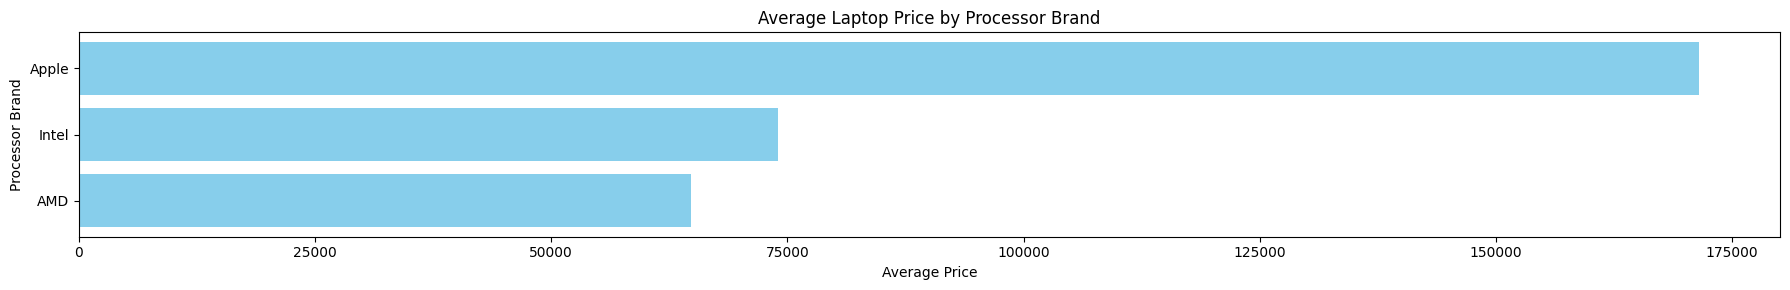

In [768]:
# Calculate mean price by Processor_Brand
avg_price_tier = df.groupby('Processor_Brand')['Price'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(18,3))
plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Processor Brand")
plt.title("Average Laptop Price by Processor Brand")
plt.tight_layout()
plt.show()

In [769]:
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique processor type: {df['Brand'].value_counts()}")

Unique Values: ['Lenovo', 'Dell', 'HP', 'Other', 'Acer', 'ASUS', 'MSI', 'Samsung', 'Apple']
Categories (9, object): ['ASUS', 'Other', 'Acer', 'Apple', ..., 'HP', 'Lenovo', 'MSI', 'Samsung']

Value count for each unique processor type: Brand
ASUS       977
Lenovo     803
HP         784
Dell       420
Acer       317
MSI        309
Other      191
Samsung     59
Apple       45
Name: count, dtype: int64


In [770]:
# print(f"Unique Values: {df['Processor_Series'].unique()}\n")
# print(f"Value count for each unique processor type: {df['Processor_Series'].value_counts()}")

### Processor speed

In [771]:
#Clean processr speed column (Ghz)
df['Ghz'] = df['Ghz'].str.rstrip('Ghz Processor').astype(float)
df.rename(columns={'Ghz': 'Processer_speed'}, inplace=True)
print(f"Unique Values: {df['Processer_speed'].unique()}\n")
df['Processer_speed'].value_counts()

Unique Values: [4.  3.3 4.2 1.7 0.  2.5 2.2 2.9 3.4 2.6 3.  4.7 3.1 2.7 2.8 2.4 2.1 4.8
 1.2 1.  1.8 2.  1.1 2.3 1.6 0.8 1.3 1.5 1.9 5.5 1.4]



Processer_speed
4.2    331
2.4    249
4.7    244
1.6    233
2.3    212
0.0    202
3.3    197
4.8    181
2.1    176
2.6    175
2.5    163
2.0    157
1.2    148
3.0    138
3.4    137
4.0    106
1.1    103
1.8     98
2.2     96
2.8     89
1.0     81
3.1     80
1.7     74
2.7     56
1.3     44
2.9     34
1.4     26
1.5     24
0.8     20
5.5     16
1.9     15
Name: count, dtype: int64

In [772]:
df[df['Processer_speed']==0]

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
4,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,34990,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,DDR4 RAM,0.0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter
11,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,104990,Intel Core i7 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,16,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,1024 GB SSD Storage,No HDD,230,230W Adapter
13,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,112980,Intel Core i7 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,16,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,1024 GB SSD Storage,No HDD,230,230W Adapter
17,Acer,Acer Nitro V ANV15-51 (UN.QN8SI.001) Laptop (1...,77860,Intel Core i5 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,15.6,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,512 GB SSD Storage,No HDD,135,135W Adapter
46,HP,HP 15s-du3564TU (5R7P5PA) Laptop (15.6 Inch | ...,49999,Intel Core i3 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,Acer,Acer Aspire 5 A515-45 (NX.A84SI.007) Laptop (1...,49990,AMD Hexa-Core Ryzen 5 Processor,AMD,No,8,DDR4 RAM,0.0,LED,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,48,48W Adapter
3800,ASUS,ASUS VivoBook 15 X515EA-BR391TS Laptop (15.6 I...,29990,Intel Core i3 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,15.6,UHD,Intel,NO SSD,1024 GB HDD Storage,no,NaN
3812,ASUS,ASUS VivoBook 14 X415EA-EK678TS Laptop (14 Inc...,49990,Intel Core i5 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,14,UHD,Intel,256 GB SSD Storage,No HDD,45,45W Adapter
3862,ASUS,ASUS TUF Dash F15 FX516PR-AZ108TS Laptop (15.6...,146000,Intel Core i7 (11th Gen) Processor,Intel,Yes,16,DDR4 RAM,0.0,LED,15.6,"GeForce RTX 3070 GPU, 8 GB",NVIDIA,1024 GB SSD Storage,No HDD,200,200W Adapter


In [773]:
apple_df = df[df['Brand'] == 'Apple'][['Brand', 'Processor_Brand', 'Processer_speed']]
print(apple_df)

print(apple_df['Processor_Brand'].value_counts())

      Brand Processor_Brand  Processer_speed
79    Apple           Apple              2.9
81    Apple           Intel              1.8
95    Apple           Apple              0.0
225   Apple           Apple              0.0
362   Apple           Intel              2.4
367   Apple           Apple              0.0
693   Apple           Apple              0.0
1336  Apple           Intel              1.6
1342  Apple           Intel              1.6
1343  Apple           Intel              1.6
1345  Apple           Intel              1.6
1410  Apple           Intel              1.1
1434  Apple           Intel              1.6
1539  Apple           Apple              0.0
1556  Apple           Intel              1.6
1565  Apple           Intel              0.0
1666  Apple           Intel              1.6
1671  Apple           Intel              1.1
1693  Apple           Intel              1.6
1707  Apple           Intel              1.6
1760  Apple           Intel              1.1
1921  Appl

In [774]:
import re

def fix_processor_speed(row):
    if row["Processer_speed"] == 0 or pd.isna(row["Processer_speed"]):
        match = re.search(r"\d+(\.\d+)?", str(row["Processor_Brand"]))
        if match:
            return float(match.group(0))
    return row["Processer_speed"]

df["Processer_speed"] = df.apply(fix_processor_speed, axis=1)
df["Processer_speed"].value_counts()


Processer_speed
4.2    331
2.4    249
4.7    244
1.6    233
2.3    212
0.0    202
3.3    197
4.8    181
2.1    176
2.6    175
2.5    163
2.0    157
1.2    148
3.0    138
3.4    137
4.0    106
1.1    103
1.8     98
2.2     96
2.8     89
1.0     81
3.1     80
1.7     74
2.7     56
1.3     44
2.9     34
1.4     26
1.5     24
0.8     20
5.5     16
1.9     15
Name: count, dtype: int64

In [775]:
df[df['Processer_speed']==0]

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
4,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,34990,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,DDR4 RAM,0.0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter
11,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,104990,Intel Core i7 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,16,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,1024 GB SSD Storage,No HDD,230,230W Adapter
13,Acer,Acer Predator Helios Neo 16 PHN16-71 (NH.QLTSI...,112980,Intel Core i7 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,16,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,1024 GB SSD Storage,No HDD,230,230W Adapter
17,Acer,Acer Nitro V ANV15-51 (UN.QN8SI.001) Laptop (1...,77860,Intel Core i5 (13th Gen) Processor,Intel,Yes,16,DDR5 RAM,0.0,LCD,15.6,"GeForce RTX 4050 GPU, 6 GB",NVIDIA,512 GB SSD Storage,No HDD,135,135W Adapter
46,HP,HP 15s-du3564TU (5R7P5PA) Laptop (15.6 Inch | ...,49999,Intel Core i3 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,Acer,Acer Aspire 5 A515-45 (NX.A84SI.007) Laptop (1...,49990,AMD Hexa-Core Ryzen 5 Processor,AMD,No,8,DDR4 RAM,0.0,LED,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,48,48W Adapter
3800,ASUS,ASUS VivoBook 15 X515EA-BR391TS Laptop (15.6 I...,29990,Intel Core i3 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,15.6,UHD,Intel,NO SSD,1024 GB HDD Storage,no,NaN
3812,ASUS,ASUS VivoBook 14 X415EA-EK678TS Laptop (14 Inc...,49990,Intel Core i5 (11th Gen) Processor,Intel,No,8,DDR4 RAM,0.0,LED,14,UHD,Intel,256 GB SSD Storage,No HDD,45,45W Adapter
3862,ASUS,ASUS TUF Dash F15 FX516PR-AZ108TS Laptop (15.6...,146000,Intel Core i7 (11th Gen) Processor,Intel,Yes,16,DDR4 RAM,0.0,LED,15.6,"GeForce RTX 3070 GPU, 8 GB",NVIDIA,1024 GB SSD Storage,No HDD,200,200W Adapter


In [776]:

def fix_apple_processor_name(row):
    if row["Brand"] == "Apple" and row["Processor_Brand"] == "Apple":
        # Extract the part between the first and second '|'
        match = re.search(r'\|\s*([^|]+?)\s*\|', row["Name"])
        if match:
            return match.group(1).strip()
    return row["Processor_Name"]

# Update the column directly
df["Processor_Name"] = df.apply(fix_apple_processor_name, axis=1)



In [777]:
# Filter rows where Processor_Brand is Apple
apple_df = df[df['Processor_Brand'] == 'Apple'][['Processor_Name', 'Processor_Brand', 'Processer_speed']]

# View the resulting DataFrame
print(apple_df)

     Processor_Name Processor_Brand  Processer_speed
79         Apple M1           Apple              2.9
95         Apple M2           Apple              0.0
225        Apple M2           Apple              0.0
367        Apple M2           Apple              0.0
693    Apple M2 Max           Apple              0.0
1539       Apple M1           Apple              0.0
1921       Apple M2           Apple              0.0
1949       Apple M2           Apple              0.0
1955       Apple M2           Apple              0.0
1957       Apple M2           Apple              0.0
1958       Apple M2           Apple              0.0
1959       Apple M2           Apple              0.0
1960       Apple M2           Apple              0.0
2179   Apple M2 Pro           Apple              3.4
2207   Apple M2 Pro           Apple              3.4
2221   Apple M2 Max           Apple              3.4
2294   Apple M2 Pro           Apple              3.4
3032   Apple M1 Pro           Apple           

In [778]:
# Define typical Apple processor speeds (in GHz)
apple_speed_map = {
    "Apple M1": 3.2,
    "Apple M1 Pro": 3.2,
    "Apple M2": 3.5,
    "Apple M2 Pro": 3.5,
    "Apple M2 Max": 3.5,
}

# Update Processer_speed for Apple processors
df.loc[
    (df["Processor_Brand"] == "Apple") & (df["Processor_Name"].isin(apple_speed_map.keys())),
    "Processer_speed"
] = df["Processor_Name"].map(apple_speed_map)


In [779]:
# Filter rows where Processor_Brand is Apple
apple_df = df[df['Processor_Brand'] == 'Apple'][['Processor_Name', 'Processor_Brand', 'Processer_speed']]

# View the resulting DataFrame
print(apple_df)

     Processor_Name Processor_Brand  Processer_speed
79         Apple M1           Apple              3.2
95         Apple M2           Apple              3.5
225        Apple M2           Apple              3.5
367        Apple M2           Apple              3.5
693    Apple M2 Max           Apple              3.5
1539       Apple M1           Apple              3.2
1921       Apple M2           Apple              3.5
1949       Apple M2           Apple              3.5
1955       Apple M2           Apple              3.5
1957       Apple M2           Apple              3.5
1958       Apple M2           Apple              3.5
1959       Apple M2           Apple              3.5
1960       Apple M2           Apple              3.5
2179   Apple M2 Pro           Apple              3.5
2207   Apple M2 Pro           Apple              3.5
2221   Apple M2 Max           Apple              3.5
2294   Apple M2 Pro           Apple              3.5
3032   Apple M1 Pro           Apple           

In [780]:
print(f"Unique Values: {df['Processor_Name'].unique()}\n")
print(f"Value count for each unique processor type: {df['Processor_Name'].value_counts()}")

Unique Values: ['AMD Hexa-Core Ryzen 5' 'Intel Core i5 (12th Gen)'
 'Intel Core i3 (11th Gen)' 'Intel Core i5 (11th Gen) Processor'
 'Intel Core i5 (11th Gen)' 'Intel Core i3 (8th Gen)'
 'AMD Octa-Core Ryzen 7' 'AMD Dual-Core Ryzen 3'
 'Intel Core i7 (13th Gen) Processor' 'Intel Core i5 (13th Gen) Processor'
 'Intel Core Ultra 5' 'Intel Celeron Dual-Core' 'AMD Quad-Core Ryzen 3'
 'Intel Core i5 (10th Gen)' 'Intel Core i3 (12th Gen)'
 'Intel Pentium Quad-Core' 'Intel Core i5 (13th Gen)'
 'Intel Core i9 (12th Gen)' 'Intel Core i3 (11th Gen) Processor'
 'Intel Core i9 (11th Gen)' 'Intel Core i7 (10th Gen)'
 'Intel Core i3 (10th Gen)' 'Intel Core i7 (13th Gen)'
 'Intel Core i3 (12th Gen) Processor' 'AMD Quad-Core Ryzen 5' 'Apple M1'
 'Intel Core i5 (5th Gen)' 'Apple M2' 'AMD Hexa-Core Ryzen 5 Processor'
 'Intel Core i3 (7th Gen)' 'Intel Core i5 (8th Gen)'
 'Intel Pentium Dual-Core' 'Intel Core i5 (9th Gen)'
 'Intel Core i3 (6th Gen)' 'AMD Dual-Core Athlon'
 'Intel Core i7 (11th Gen)' 'Inte

In [781]:
df

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,Yes,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
1,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,Yes,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
2,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,Yes,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
3,Other,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,No,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
4,Acer,Acer One 14 Z8-415 (UN.599SI.020) Laptop (14 I...,34990,Intel Core i5 (11th Gen) Processor,Intel,Yes,16,DDR4 RAM,0.0,LCD,14,Iris Xe,Intel,512 GB SSD Storage,No HDD,45,45W Adapter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,Yes,8,DDR4 RAM,1.6,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3901,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,No,8,DDR4 RAM,4.0,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3902,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,No,16,DDR4 RAM,3.1,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3903,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,Yes,8,DDR4 RAM,2.1,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [782]:
df.drop(df[df['Processer_speed']==0].index, inplace=True) #Remove rows with 0 Ghz

In [783]:
df.shape

(3715, 17)

In [784]:
df['Brand'].value_counts()

Brand
ASUS       945
Lenovo     777
HP         755
Dell       402
MSI        292
Acer       257
Other      186
Samsung     57
Apple       44
Name: count, dtype: int64

### Processor Brand

In [785]:
# apple_df = df[df['Brand'] == 'Apple'][['Name','Brand', 'Processor_Brand','Processer_speed', 'Processor_Name']]
# print(apple_df)

# print(apple_df['Processer_speed'].value_counts())

In [786]:


def split_processor_details(value):
    if pd.isna(value) or str(value).strip() == "":
        return ("Unknown", "Unknown")
    
    text = value.strip()

    # Extract brand (first word before space)
    brand = text.split()[0]

    # Remove everything inside parentheses and after it
    text_before_parenthesis = re.split(r'\(', text)[0].strip()

    # Remove the brand name from the start
    series = re.sub(rf'^{brand}\s*', '', text_before_parenthesis, flags=re.IGNORECASE).strip()

    return (brand, series)

# Apply to DataFrame
df[["Processor_Brand_Extracted", "Processor_Series"]] = df["Processor_Name"].apply(lambda x: pd.Series(split_processor_details(x)))


In [787]:
print(f"Unique Values: {df['Processor_Brand_Extracted'].unique()}\n")
print(f"Value count for each unique processor type: {df['Processor_Brand_Extracted'].value_counts()}")

Unique Values: ['AMD' 'Intel' 'Apple']

Value count for each unique processor type: Processor_Brand_Extracted
Intel    2822
AMD       875
Apple      18
Name: count, dtype: int64


In [788]:
intel_df = df[df['Processor_Brand'] == 'Intel'][['Brand', 'Processor_Brand', "Processor_Series"]]
print(intel_df)

print(intel_df['Processor_Series'].value_counts())


       Brand Processor_Brand Processor_Series
1       Dell           Intel          Core i5
2         HP           Intel          Core i5
3      Other           Intel          Core i3
6       Acer           Intel          Core i5
7     Lenovo           Intel          Core i3
...      ...             ...              ...
3898    ASUS           Intel          Core i9
3899     MSI           Intel          Core i7
3900    ASUS           Intel          Core i5
3901    ASUS           Intel          Core i3
3904  Lenovo           Intel          Core i5

[2822 rows x 3 columns]
Processor_Series
Core i5              1220
Core i3               644
Core i7               602
Celeron Dual-Core      92
Core i9                85
Core Ultra 7           52
Pentium Quad-Core      43
Core Ultra 5           24
Core Ultra 9           16
Core 5                 11
Pentium Dual-Core       8
Pentium Gold            6
Core 7                  5
Core M3                 5
Celeron Quad-Core       5
Atom Quad-Core  

In [789]:
amd_df = df[df['Processor_Brand'] == 'AMD'][['Brand', 'Processor_Brand', "Processor_Series"]]
print(amd_df)

print(amd_df['Processor_Series'].value_counts())



       Brand Processor_Brand   Processor_Series
0     Lenovo             AMD  Hexa-Core Ryzen 5
5         HP             AMD  Hexa-Core Ryzen 5
9     Lenovo             AMD  Octa-Core Ryzen 7
10        HP             AMD  Dual-Core Ryzen 3
22        HP             AMD  Octa-Core Ryzen 7
...      ...             ...                ...
3873    Dell             AMD  Octa-Core Ryzen 7
3879    ASUS             AMD  Quad-Core Ryzen 5
3896      HP             AMD  Octa-Core Ryzen 7
3902    ASUS             AMD  Octa-Core Ryzen 7
3903    ASUS             AMD  Quad-Core Ryzen 5

[875 rows x 3 columns]
Processor_Series
Hexa-Core Ryzen 5        245
Octa-Core Ryzen 7        238
Quad-Core Ryzen 5        108
Dual-Core Ryzen 3         67
Quad-Core Ryzen 3         46
Octa-Core Ryzen 9         45
Dual-Core Athlon          34
Dual-Core A6 APU          21
Dual-Core A9 APU          20
Quad-Core Ryzen 7         11
Dual-Core APU              8
Quad-Core A8 APU           7
Dual-Core A4 APU           6
Dual-C

In [790]:
# apu = df[df['Processor_Series']=='Quad-Core APU'][['Name']]
# apu

In [791]:
# apu = df[df['Processor_Series']=='Dual-Core APU'][['Name']]
# apu

In [792]:
# import re

# def update_processor_name(row):
#     name = row['Processor_Name']
#     brand = row['Processor_Brand']
    
#     if brand == 'Intel':
#         # Capture i3/i5/i7/i9 or Core Ultra, Core series, etc.
#         match = re.search(r'(i[3579]|core\s*[3579])', name, re.I)
#         if match:
#             # Standardize naming: convert "core 5" → "i5"
#             text = match.group(0).lower()
#             if "core" in text:
#                 # Extract the number after "core"
#                 num = re.search(r'[3579]', text).group(0)
#                 return f"Intel Core I{num}"
#             else:
#                 return f"Intel Core {text.upper()}"
#         elif re.search(r'Ultra\s*5', name, re.I):
#             return "Intel Core Ultra 5"
#         elif re.search(r'Ultra\s*7', name, re.I):
#             return "Intel Core Ultra 7"
#         elif re.search(r'Ultra\s*9', name, re.I):
#             return "Intel Core Ultra 9"
#         elif re.search(r'Pentium', name, re.I):
#             return "Intel Pentium"
#         elif re.search(r'Celeron', name, re.I):
#             return "Intel Celeron"
#         else:
#             return "Intel Other"
    
#     elif brand == 'AMD':
#         # Ryzen families or Athlon/A-series
#         match = re.search(r'Ryzen\s*[3579]', name, re.I)
#         if match:
#             return f"AMD {match.group(0).title()}"
#         elif re.search(r'Athlon', name, re.I):
#             return "AMD Athlon"
#         elif re.search(r'A\d', name, re.I):
#             # e.g., A6, A8, A10, A12
#             a_match = re.search(r'A\d+', name, re.I)
#             return f"AMD {a_match.group(0).upper()}"
#         else:
#             return "AMD Other"
    
#     elif brand == 'Apple':
#         # All M-series grouped together
#         a_match = re.search(r'M\d+', name, re.I)
#         return f"Apple {a_match.group(0).upper()}"
    
#     else:
#         return "Other"

# # Apply to DataFrame
# df['Processor_Name'] = df.apply(update_processor_name, axis=1)

# # Quick look at the result
# print(df['Processor_Name'].value_counts())


In [793]:
import re

def categorize_processor(row):
    name = row['Processor_Series']
    brand = row['Processor_Brand']
    
    if brand == 'Intel':
        # Capture i3/i5/i7/i9 or Core Ultra, Core series, etc.
        match = re.search(r'(i[3579]|core\s*[3579])', name, re.I)
        if match:
            # Standardize naming: convert "core 5" → "i5"
            text = match.group(0).lower()
            if "core" in text:
                # Extract the number after "core"
                num = re.search(r'[3579]', text).group(0)
                return f"Intel Core I{num}"
            else:
                return f"Intel Core {text.upper()}"
        elif re.search(r'Ultra\s*5', name, re.I):
            return "Intel Core Ultra 5"
        elif re.search(r'Ultra\s*7', name, re.I):
            return "Intel Core Ultra 7"
        elif re.search(r'Ultra\s*9', name, re.I):
            return "Intel Core Ultra 9"
        elif re.search(r'Pentium', name, re.I):
            return "Intel Pentium"
        elif re.search(r'Celeron', name, re.I):
            return "Intel Celeron"
        else:
            return "Intel Other"
    
    elif brand == 'AMD':
        # Ryzen families or Athlon/A-series
        match = re.search(r'Ryzen\s*[3579]', name, re.I)
        if match:
            return f"AMD {match.group(0).title()}"
        elif re.search(r'Athlon', name, re.I):
            return "Athlon"
        elif re.search(r'A\d', name, re.I):
            # e.g., A6, A8, A10, A12
            a_match = re.search(r'A\d+', name, re.I)
            return "AMD A-Series"
        else:
            return "AMD Other"
    
    elif brand == 'Apple':
        # All M-series grouped together
        return "Apple M-series"
    
    else:
        return "Other"

# Apply to DataFrame
df['Processor_Series'] = df.apply(categorize_processor, axis=1)

# Quick look at the result
print(df['Processor_Series'].value_counts())


Processor_Series
Intel Core I5         1231
Intel Core I3          645
Intel Core I7          607
AMD Ryzen 5            353
AMD Ryzen 7            250
AMD Ryzen 3            113
Intel Celeron           97
Intel Core I9           85
AMD A-Series            61
Intel Pentium           57
Intel Core Ultra 7      52
AMD Ryzen 9             46
Athlon                  34
Intel Core Ultra 5      24
AMD Other               18
Apple M-series          18
Intel Core Ultra 9      16
Intel Other              8
Name: count, dtype: int64


In [794]:
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique Brand type: {df['Brand'].value_counts()}")

Unique Values: ['Lenovo', 'Dell', 'HP', 'Other', 'Acer', 'ASUS', 'MSI', 'Samsung', 'Apple']
Categories (9, object): ['ASUS', 'Other', 'Acer', 'Apple', ..., 'HP', 'Lenovo', 'MSI', 'Samsung']

Value count for each unique Brand type: Brand
ASUS       945
Lenovo     777
HP         755
Dell       402
MSI        292
Acer       257
Other      186
Samsung     57
Apple       44
Name: count, dtype: int64


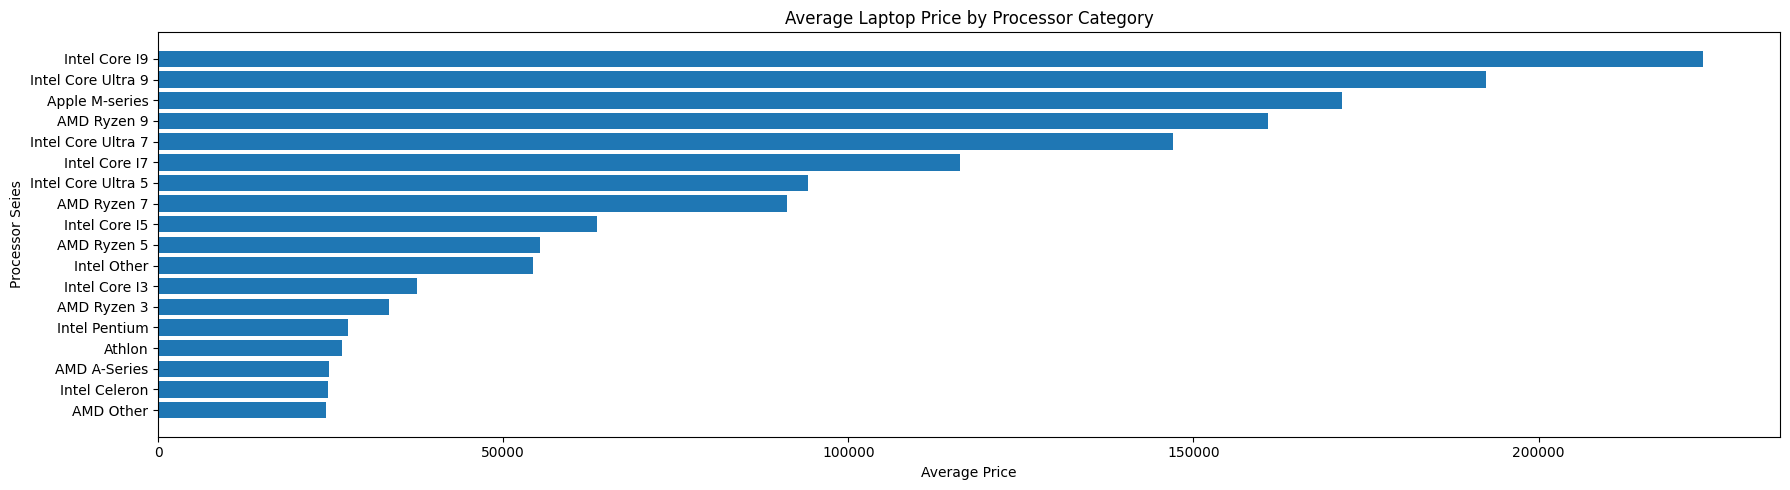

In [795]:
avg_price = df.groupby('Processor_Series')['Price'].mean().sort_values()

plt.figure(figsize=(18,5))
plt.barh(avg_price.index, avg_price.values)   
plt.xlabel("Average Price")
plt.ylabel("Processor Seies")
plt.title("Average Laptop Price by Processor Category")
plt.tight_layout()
plt.show()

In [796]:
print(f"Unique Values: {df['Processor_Series'].unique()}\n")
print(f"Value count for each unique processor series type: {df['Processor_Series'].value_counts()}")

Unique Values: ['AMD Ryzen 5' 'Intel Core I5' 'Intel Core I3' 'AMD Ryzen 7' 'AMD Ryzen 3'
 'Intel Core Ultra 5' 'Intel Celeron' 'Intel Pentium' 'Intel Core I9'
 'Intel Core I7' 'Apple M-series' 'Athlon' 'AMD Other' 'AMD A-Series'
 'AMD Ryzen 9' 'Intel Core Ultra 7' 'Intel Core Ultra 9' 'Intel Other']

Value count for each unique processor series type: Processor_Series
Intel Core I5         1231
Intel Core I3          645
Intel Core I7          607
AMD Ryzen 5            353
AMD Ryzen 7            250
AMD Ryzen 3            113
Intel Celeron           97
Intel Core I9           85
AMD A-Series            61
Intel Pentium           57
Intel Core Ultra 7      52
AMD Ryzen 9             46
Athlon                  34
Intel Core Ultra 5      24
AMD Other               18
Apple M-series          18
Intel Core Ultra 9      16
Intel Other              8
Name: count, dtype: int64


In [797]:
# def map_processor_performance(row):
#     brand = row['Processor_Brand']
#     series   = row['Processor_Series']

#     if brand == 'Intel':
#         if series in ['Intel Core Ultra 9', 'Intel Core I9', 'Intel Core Ultra 7']:
#             return 'High-End'
#         elif series in ['Intel Core I5', 'Intel Core I7', 'Intel Core Ultra 5']:
#             return 'Mid-End'
#         elif series in ['Intel Core I3', 'Intel Celeron', 'Intel Pentium', 'Intel Other']:
#             return 'Low-End'

#     elif brand == 'AMD':
#         if series in ['AMD Ryzen 9', 'AMD Ryzen 7']:
#             return 'High-End'
#         elif series in ['AMD Ryzen 5']:
#             return 'Mid-End'
#         elif series in [
#             'AMD Ryzen 3', 'Athlon', 'AMD A-Series', 'AMD Other'
#         ]:
#             return 'Low-End'

#     elif brand == 'Apple':
#         return 'Apple M-series'  

#     return 'Other'  

In [798]:
def map_processor_performance(row):
    brand = row['Processor_Brand']
    series   = row['Processor_Series']

    if brand == 'Intel':
        if series in ['Intel Core Ultra 9', 'Intel Core I9']:
            return 'High-End'
        elif series in ['Intel Core I7',  'Intel Core Ultra 7']:
            return 'Upper Mid-End'
        elif series in ['Intel Core I5', 'Intel Core Ultra 5']:
            return 'Mid-End'
        elif series in ['Intel Core I3', 'Intel Celeron', 'Intel Pentium', 'Intel Other']:
            return 'Low-End'

    elif brand == 'AMD':
        if series in ['AMD Ryzen 9']:
            return 'High-End'
        elif series in ['AMD Ryzen 7']:
            return 'Upper Mid-End'
        elif series in ['AMD Ryzen 5']:
            return 'Mid-End'
        elif series in [
            'AMD Ryzen 3', 'Athlon', 'AMD A-Series', 'AMD Other'
        ]:
            return 'Low-End'

    elif brand == 'Apple':
        return 'Apple M-series'  

    return 'Other'  

In [799]:
df['Processor_Tier'] = df.apply(map_processor_performance, axis=1)
print(df['Processor_Tier'].value_counts())

Processor_Tier
Mid-End           1608
Low-End           1033
Upper Mid-End      909
High-End           147
Apple M-series      18
Name: count, dtype: int64


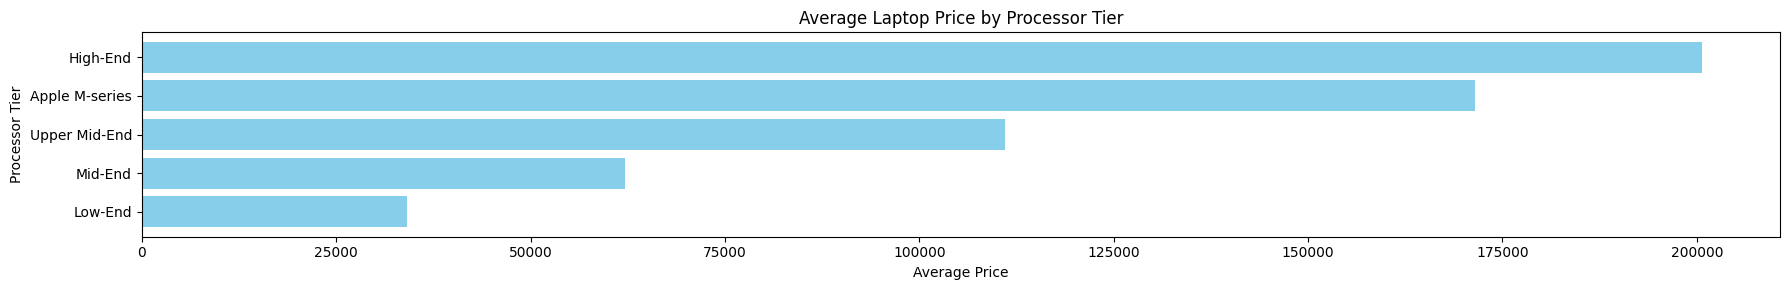

In [800]:
# Calculate mean price by Processor_Tier
avg_price_tier = df.groupby('Processor_Tier')['Price'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(18,3))
plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Processor Tier")
plt.title("Average Laptop Price by Processor Tier")
plt.tight_layout()
plt.show()

In [801]:
# df.shape

In [802]:
# # Keep only the major processor brands
# valid_brands = ["AMD", "Apple", "Intel"]

# df = df[df["Processor_Brand"].isin(valid_brands)].reset_index(drop=True)
# df.shape



In [803]:
# print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
# print(f"Value count for each unique processor type: {df['Processor_Brand'].value_counts()}")

In [804]:
print(f"Unique Values: {df['Brand'].unique()}\n")
print(f"Value count for each unique processor type: {df['Brand'].value_counts()}")

Unique Values: ['Lenovo', 'Dell', 'HP', 'Other', 'Acer', 'ASUS', 'MSI', 'Samsung', 'Apple']
Categories (9, object): ['ASUS', 'Other', 'Acer', 'Apple', ..., 'HP', 'Lenovo', 'MSI', 'Samsung']

Value count for each unique processor type: Brand
ASUS       945
Lenovo     777
HP         755
Dell       402
MSI        292
Acer       257
Other      186
Samsung     57
Apple       44
Name: count, dtype: int64


In [805]:
# print(f"Unique Values: {df['Processor_Series'].unique()}\n")
# print(f"Value count for each unique processor type: {df['Processor_Series'].value_counts()}")

In [806]:
# apple_df = df[df['Brand'] == 'Apple'][['Brand', 'Processor_Brand_Extracted']]
# print(apple_df)

# print(apple_df['Processor_Brand_Extracted'].value_counts())

### Generation

In [807]:
# def gen(text):
#     if 'Intel' in text:
#         if 'i3' in text or 'i5' in text or 'i7' in text or 'i9' in text:
#             if text.split()[3][-2:]=='th':
#                 return int(text.split('th')[0].split('(')[-1])
#             elif text.split()[3][-2:]=='st':
#                 return int(text.split('st')[0].split('(')[-1])
#             elif text.split()[3][-2:]=='nd':
#                 return int(text.split('nd')[0].split('(')[-1])
#             elif text.split()[3][-2:]=='rd':
#                 return int(text.split('rd')[0].split('(')[-1])
#             else:
#                 return 0
                
#         else:
#             return 0
#     else:
#         return 0
    


# df['Generation']=df['Processor_Name'].apply(gen)  
# df['Generation']=df['Generation'].astype(np.int16)
# df['Generation'].value_counts()

### Operating System

In [808]:
def gen(text):
    if ('Windows 11' in text.split('|')[3]) or 'Windows 10' in text.split('|')[3] or ('Windows 8.1' in text.split('|')[3]) or ('DOS' in text.split('|')[3]) or ('Linux' in text.split('|')[3]) or ('Ubuntu' in text.split('|')[3]) :
        return text.split('|')[3].strip()
    elif 'macOS' in text.split('|')[3]:
        return 'macOS'
    else:
        return 'Others'
    
df['Operating_System'] = df['Name'].apply(gen)
df['Operating_System'].value_counts()

Operating_System
Windows 11     2028
Windows 10     1392
DOS             179
macOS            44
Others           25
Linux            22
Windows 8.1      18
Ubuntu            7
Name: count, dtype: int64

### Display Size

In [809]:
#Clean Display size column
df[df['Display']=='OLED Display With Touchscreen']


,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,...,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life,Processor_Brand_Extracted,Processor_Series,Processor_Tier,Operating_System
768,HP,HP ENVY 15 ep1087TX (54B88PA) Laptop (| Core i...,189400,Intel Core i9 (11th Gen),Intel,No,32,DDR4 RAM,4.8,LED,...,"GeForce RTX 3060 GPU, 6 GB",NVIDIA,1024 GB SSD Storage,No HDD,83,Upto 7.15 Hrs Battery Life,Intel,Intel Core I9,High-End,Windows 11


In [810]:
df = df[df['Display'] != 'OLED Display With Touchscreen'] #Remove rows with non-numeric display sizes
# df['Display']=df['Display'].astype(np.float32)
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df.rename(columns={'Display': 'Display_size(inch)'}, inplace=True)
print(f"Unique Values: {df['Display_size(inch)'].unique()}\n")

Unique Values: [15.6 14.  17.3 11.6 13.3 16.1 16.  13.6 14.1 15.3 13.4 15.  10.5 13.5
 13.  12.4 16.2 17.  18.  14.5 12.  14.9 11.  12.3 16.6 14.2 12.2 10.1
 12.5 15.4]



C:\Users\USER\AppData\Local\Temp\ipykernel_12748\3879373161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
C:\Users\USER\AppData\Local\Temp\ipykernel_12748\3879373161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Display': 'Display_size(inch)'}, inplace=True)


In [811]:
def display_category(x):
    if x <= 14.0:
        return 'Small'
    elif x <= 15.6:
        return 'Medium'
    else:
        return 'Large'

df['Display_Category'] = df['Display_size(inch)'].apply(display_category)
df['Display_Category'].value_counts()


C:\Users\USER\AppData\Local\Temp\ipykernel_12748\2374137631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Display_Category'] = df['Display_size(inch)'].apply(display_category)


Display_Category
Medium    2128
Small     1198
Large      388
Name: count, dtype: int64

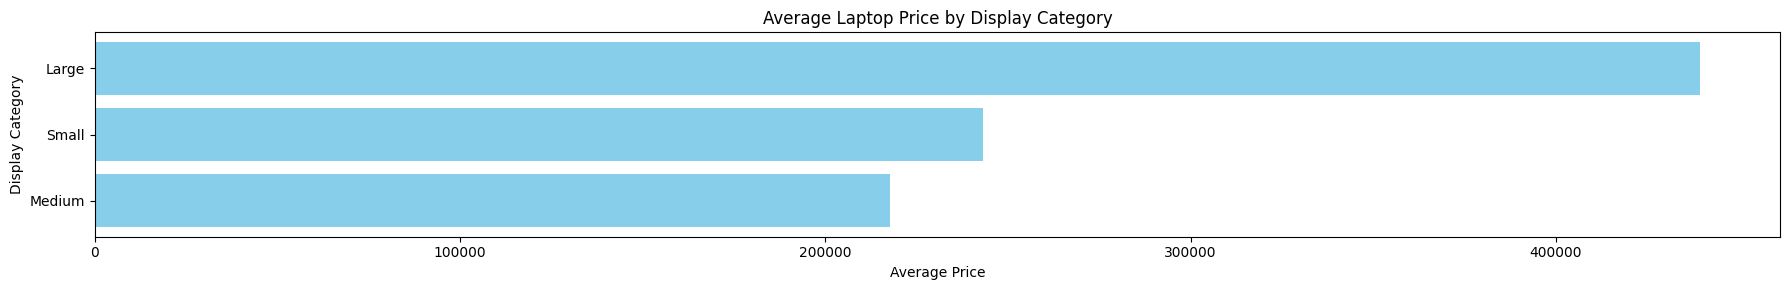

In [858]:
# Calculate mean price by Processor_Tier
avg_price_tier = df.groupby('Display_Category')['Price'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(18,3))
plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("Display Category")
plt.title("Average Laptop Price by Display Category")
plt.tight_layout()
plt.show()

### SSD

In [812]:
#Clean SSD column
df['SSD'] = df['SSD'].str.extract(r"(\d+)").fillna(0).astype(int) 
df.rename(columns={'SSD': 'SSD(GB)'}, inplace=True)
print(f"Unique Values: {df['SSD(GB)'].unique()}\n")

Unique Values: [ 512    0 1024  256   64  128 2048    1    8   16   32 4098]



C:\Users\USER\AppData\Local\Temp\ipykernel_12748\1665534272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSD'] = df['SSD'].str.extract(r"(\d+)").fillna(0).astype(int)
C:\Users\USER\AppData\Local\Temp\ipykernel_12748\1665534272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'SSD': 'SSD(GB)'}, inplace=True)


In [813]:

standard_sizes = [0, 128, 256, 512, 1024]

# Keep only these values
df = df[df['SSD(GB)'].isin(standard_sizes)]

# Check results
print(df['SSD(GB)'].value_counts())

SSD(GB)
512     1824
0        632
1024     553
256      531
128       99
Name: count, dtype: int64


In [814]:
df.shape

(3639, 22)

### HDD

In [815]:
#Clean HDD column
df['HDD'] = df['HDD'].str.extract(r"(\d+)").fillna(0).astype(int)
df.rename(columns={'HDD': 'HDD(GB)'}, inplace=True)
print(f"Unique Values: {df['HDD(GB)'].unique()}\n")
# df['HDD(GB)'].value_counts()

Unique Values: [   0 1024 2048  500    1]



In [816]:
standard_hdd = [0, 500, 1024]

# Keep only these values
df = df[df['HDD(GB)'].isin(standard_hdd)]

# Check results
print(df['HDD(GB)'].value_counts())

HDD(GB)
0       2738
1024     846
500       35
Name: count, dtype: int64


In [817]:
df.shape

(3619, 22)

In [818]:
# df['Processor_Brand'] = df['Processor_Brand'].astype('category')
# print(f"Unique Values: {df['Processor_Brand'].unique()}\n")
# print(f"Value count for each unique Processor_Brand type: {df['Processor_Brand'].value_counts()}\n")

In [819]:
df.head()

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,...,GPU_Brand,SSD(GB),HDD(GB),Adapter,Battery_Life,Processor_Brand_Extracted,Processor_Series,Processor_Tier,Operating_System,Display_Category
0,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,Yes,8,DDR4 RAM,4.0,LCD,...,AMD,512,0,65,Upto 11 Hrs Battery Life,AMD,AMD Ryzen 5,Mid-End,Windows 11,Medium
1,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,Yes,16,DDR5 RAM,3.3,LCD,...,NVIDIA,512,0,56,Upto 10 Hrs Battery Life,Intel,Intel Core I5,Mid-End,Windows 11,Medium
2,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,Yes,8,DDR4 RAM,4.2,LCD,...,Intel,512,0,no,Upto 7.30 Hrs Battery Life,Intel,Intel Core I5,Mid-End,Windows 11,Medium
3,Other,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,No,8,LPDDR4X RAM,1.7,LCD,...,Intel,512,0,45,Upto 8 Hrs Battery Life,Intel,Intel Core I3,Low-End,Windows 11,Medium
5,HP,HP 14s-fq1092AU (50M60PA) Laptop (14 Inch | AM...,49599,AMD Hexa-Core Ryzen 5,AMD,Yes,8,DDR4 RAM,4.0,LCD,...,AMD,512,0,65,Upto 9 Hrs Battery Life,AMD,AMD Ryzen 5,Mid-End,Windows 11,Small


### RAM Type

In [820]:
#Clean RAM_TYPE column
   
df['RAM_TYPE'] = df['RAM_TYPE'].str.strip().str.upper()
mapping = {
    'DDR4 RAM': 'DDR4',
    'DDR5 RAM': 'DDR5',
    'DDR3 RAM': 'DDR3',
    'DDR2 RAM': 'DDR2',
    'LPDDR3 RAM' : 'LPDDR3',
    'LPDDR4 RAM': 'LPDDR4',
    'LPDDR4X RAM': 'LPDDR4X',
    'LPDDR5 RAM': 'LPDDR5',
    'LPDDR5X RAM': 'LPDDR5X'
}
df['RAM_TYPE'] = df['RAM_TYPE'].replace(mapping)
# df['RAM_TYPE'] = df['RAM_TYPE'].replace({'RAM': 'Other'})
df['RAM_TYPE'] = df['RAM_TYPE'].astype('category')



In [821]:
print(f"Unique Values: {df['RAM_TYPE'].unique()}\n") 
print(f"Value count for each unique RAM_TYPE type: {df['RAM_TYPE'].value_counts()}\n")

Unique Values: ['DDR4', 'DDR5', 'LPDDR4X', 'LPDDR5X', 'LPDDR5', 'LPDDR3', 'RAM', 'LPDDR4', 'DDR3', 'DDR2']
Categories (10, object): ['DDR2', 'DDR3', 'DDR4', 'DDR5', ..., 'LPDDR4X', 'LPDDR5', 'LPDDR5X', 'RAM']

Value count for each unique RAM_TYPE type: RAM_TYPE
DDR4       2619
DDR5        342
LPDDR5      224
LPDDR4X     139
DDR3        113
LPDDR5X      76
LPDDR3       47
RAM          35
LPDDR4       23
DDR2          1
Name: count, dtype: int64



In [822]:
df = df[df['RAM_TYPE'] != 'DDR2']


In [823]:
ram = df[df['RAM_TYPE']== 'RAM']
ram

,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,...,GPU_Brand,SSD(GB),HDD(GB),Adapter,Battery_Life,Processor_Brand_Extracted,Processor_Series,Processor_Tier,Operating_System,Display_Category
90,ASUS,ASUS VivoBook 15 X515EA-EJ322WS Laptop (15.6 I...,33990,Intel Core i3 (11th Gen),Intel,No,8,RAM,3.0,LCD,...,Intel,512,0,65,Upto 5 Hrs Battery Life,Intel,Intel Core I3,Low-End,Windows 11,Medium
95,Apple,Apple MacBook Air M2 MLXY3HN/A Ultrabook (13.6...,92990,Apple M2,Apple,No,8,RAM,3.5,LCD,...,Apple,256,0,65,Upto 18 Hrs Battery Life,Apple,Apple M-series,Apple M-series,macOS,Small
220,Other,Tecno MEGABOOK T1 Laptop (15.6 Inch | Core i3 ...,37999,Intel Core i3 (11th Gen),Intel,No,8,RAM,1.7,LCD,...,Intel,512,0,65,Upto 17.5 Hrs Battery Life,Intel,Intel Core I3,Low-End,Windows 11,Medium
281,Other,Honor MagicBook X 14 Laptop (14 Inch | Core i3...,39990,Intel Core i3 (10th Gen),Intel,No,8,RAM,4.2,LCD,...,Intel,256,0,56,Upto 13.2 Hrs Battery Life,Intel,Intel Core I3,Low-End,Windows 11,Small
354,Dell,Dell Vostro 14 3400 (D552217WIN9D) Laptop (14 ...,39275,Intel Core i3 (11th Gen),Intel,No,8,RAM,4.0,LCD,...,Intel,256,0,65,Upto 10 Hrs Battery Life,Intel,Intel Core I3,Low-End,Windows 11,Small
367,Apple,Apple MacBook Air M2 MLY43HN/A Ultrabook (13.6...,108990,Apple M2,Apple,No,8,RAM,3.5,LCD,...,Apple,512,0,65,Upto 18 Hrs Battery Life,Apple,Apple M-series,Apple M-series,macOS,Small
562,Samsung,Samsung Galaxy Book 3 360 NP750QFG-KA1IN Lapto...,122990,Intel Core i7 (13th Gen),Intel,No,16,RAM,2.2,LED,...,Intel,512,0,65,65W Adapter,Intel,Intel Core I7,Upper Mid-End,Windows 11,Medium
563,Samsung,Samsung Galaxy Book 3 360 NP730QFG-KA1IN Lapto...,109990,Intel Core i5 (13th Gen),Intel,No,16,RAM,1.9,LED,...,Intel,512,0,65,65W Adapter,Intel,Intel Core I5,Mid-End,Windows 11,Small
565,Samsung,Samsung Galaxy Book 3 360 NP730QFG-KA2IN Lapto...,109990,Intel Core i7 (13th Gen),Intel,Yes,16,RAM,2.2,LED,...,Intel,512,0,65,65W Adapter,Intel,Intel Core I7,Upper Mid-End,Windows 11,Small
567,Samsung,Samsung Galaxy Book 3 360 NP750QFG-KA2IN Lapto...,109990,Intel Core i5 (13th Gen),Intel,No,16,RAM,1.9,LED,...,Intel,512,0,65,65W Adapter,Intel,Intel Core I5,Mid-End,Windows 11,Medium


In [824]:
df[(df['Brand'] == 'Apple') & (df['RAM_TYPE'] == 'RAM')][['Processer_speed', 'RAM_TYPE', 'Processor_Name','Processor_Tier']].head(40)

,Processer_speed,RAM_TYPE,Processor_Name,Processor_Tier
95,3.5,RAM,Apple M2,Apple M-series
367,3.5,RAM,Apple M2,Apple M-series
693,3.5,RAM,Apple M2 Max,Apple M-series
1949,3.5,RAM,Apple M2,Apple M-series
1955,3.5,RAM,Apple M2,Apple M-series
1957,3.5,RAM,Apple M2,Apple M-series
1958,3.5,RAM,Apple M2,Apple M-series
1959,3.5,RAM,Apple M2,Apple M-series
1960,3.5,RAM,Apple M2,Apple M-series
2179,3.5,RAM,Apple M2 Pro,Apple M-series


In [825]:
# df[(df['Brand'] == 'Apple')][['Processer_speed', 'RAM_TYPE', 'Processor_Name','Processor_Tier']].head(44)

In [826]:
# Apple M2 rows: set RAM_TYPE='LPDDR5 RAM'
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Processor_Brand'] == 'Apple') &
    ((df['RAM_TYPE'] == 'RAM')) &
    df['Processor_Name'].str.contains('M2', na=False),
    ['RAM_TYPE']
] = ['LPDDR5'] # Values inserted manually by search in web

# Apple M1 rows: set RAM_TYPE='DDR4 RAM'
df.loc[
    (df['Brand'] == 'Apple') &
    (df['Processor_Brand'] == 'Apple') &
    ((df['RAM_TYPE'] == 'RAM')) &
    df['Processor_Name'].str.contains('M1', na=False),
    ['RAM_TYPE']
] = ['DDR4']




In [827]:
most_freq_ram = (
    df[df['RAM_TYPE'] != 'RAM']  # exclude placeholder 'RAM'
      .groupby(['Processor_Brand', 'Processor_Tier'])['RAM_TYPE']
      .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
      .reset_index()
      .rename(columns={'RAM_TYPE': 'Most_Freq_RAM'})
)

#Merge back to the original dataframe
df = df.merge(most_freq_ram, on=['Processor_Brand', 'Processor_Tier'], how='left')

#Replace 'RAM' with the most frequent RAM_TYPE
df['RAM_TYPE'] = df.apply(
    lambda row: row['Most_Freq_RAM'] if row['RAM_TYPE'] == 'RAM' else row['RAM_TYPE'],
    axis=1
)

df = df.drop(columns=['Most_Freq_RAM'])

df['RAM_TYPE'].value_counts()

RAM_TYPE
DDR4       2641
DDR5        342
LPDDR5      237
LPDDR4X     139
DDR3        113
LPDDR5X      76
LPDDR3       47
LPDDR4       23
Name: count, dtype: int64

In [828]:
print(f"Unique Values: {df['RAM_TYPE'].unique()}\n") 
print(f"Value count for each unique RAM_TYPE type: {df['RAM_TYPE'].value_counts()}\n")

Unique Values: ['DDR4' 'DDR5' 'LPDDR4X' 'LPDDR5X' 'LPDDR5' 'LPDDR3' 'LPDDR4' 'DDR3']

Value count for each unique RAM_TYPE type: RAM_TYPE
DDR4       2641
DDR5        342
LPDDR5      237
LPDDR4X     139
DDR3        113
LPDDR5X      76
LPDDR3       47
LPDDR4       23
Name: count, dtype: int64



In [829]:
df[(df['Brand'] == 'Apple')][['Processer_speed', 'RAM_TYPE', 'Processor_Name','Processor_Tier']].head(44)

,Processer_speed,RAM_TYPE,Processor_Name,Processor_Tier
70,3.2,DDR4,Apple M1,Apple M-series
72,1.8,LPDDR3,Intel Core i5 (5th Gen),Mid-End
86,3.5,LPDDR5,Apple M2,Apple M-series
206,3.5,LPDDR5,Apple M2,Apple M-series
334,2.4,LPDDR3,Intel Core i5 (8th Gen),Mid-End
339,3.5,LPDDR5,Apple M2,Apple M-series
642,3.5,LPDDR5,Apple M2 Max,Apple M-series
1242,1.6,LPDDR3,Intel Core i5 (8th Gen),Mid-End
1247,1.6,LPDDR3,Intel Core i5 (8th Gen),Mid-End
1248,1.6,LPDDR3,Intel Core i5 (8th Gen),Mid-End


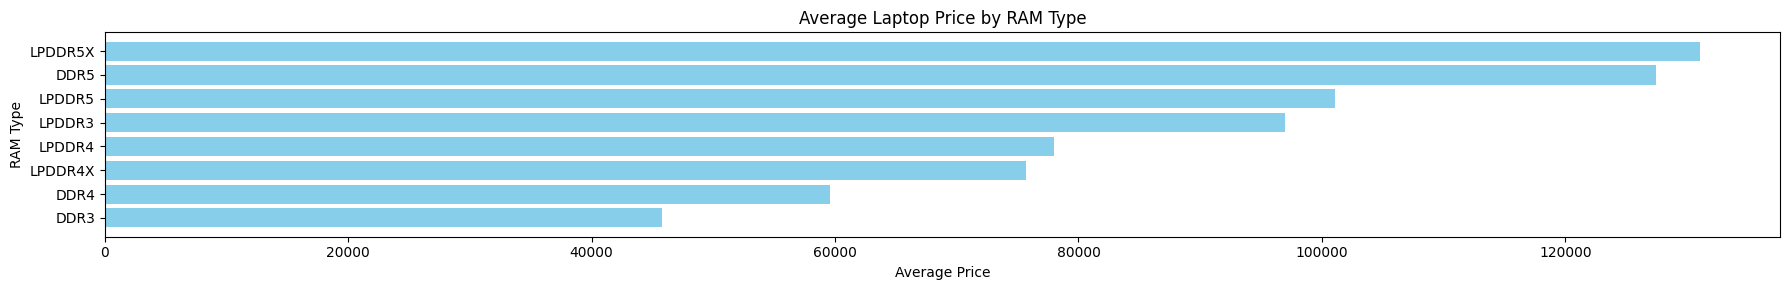

In [830]:
# Calculate mean price by RAM_TYPE
avg_price_tier = df.groupby('RAM_TYPE')['Price'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(18,3))
plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
plt.xlabel("Average Price")
plt.ylabel("RAM Type")
plt.title("Average Laptop Price by RAM Type")
plt.tight_layout()
plt.show()

In [831]:
# df['RAM_TYPE'] = df['RAM_TYPE'].replace({
#     'DDR4': 'DDR4',
#     'LPDDR4': 'DDR4',
#     'LPDDR4X': 'DDR4',

#     'DDR5': 'DDR5',
#     'LPDDR5': 'DDR5',
#     'LPDDR5X': 'DDR5',

#     'DDR3': 'DDR3',
#     'LPDDR3': 'DDR3',
# })

In [832]:
# most_freq_ram = (
#     df[df['RAM_TYPE'] != 'RAM']  # exclude placeholder 'RAM'
#       .groupby(['Processor_Brand', 'Processor_Tier'])['RAM_TYPE']
#       .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
#       .reset_index()
#       .rename(columns={'RAM_TYPE': 'Most_Freq_RAM'})
# )

# #Merge back to the original dataframe
# df = df.merge(most_freq_ram, on=['Processor_Brand', 'Processor_Tier'], how='left')

# #Replace 'RAM' with the most frequent RAM_TYPE
# df['RAM_TYPE'] = df.apply(
#     lambda row: row['Most_Freq_RAM'] if row['RAM_TYPE'] == 'RAM' else row['RAM_TYPE'],
#     axis=1
# )

# df = df.drop(columns=['Most_Freq_RAM'])

# df['RAM_TYPE'].value_counts()

In [833]:
# # Calculate mean price by RAM_TYPE
# avg_price_tier = df.groupby('RAM_TYPE')['Price'].mean().sort_values()

# # Plot horizontal bar chart
# plt.figure(figsize=(18,3))
# plt.barh(avg_price_tier.index, avg_price_tier.values, color='skyblue')
# plt.xlabel("Average Price")
# plt.ylabel("RAM Type")
# plt.title("Average Laptop Price by RAM Type")
# plt.tight_layout()
# plt.show()

### Display Type

In [834]:
df['Display_type'] = df['Display_type'].astype('category')
print(f"Unique Values: {df['Display_type'].unique()}\n")

Unique Values: ['LCD', 'LED']
Categories (2, object): ['LCD', 'LED']



In [835]:
# import re

# def clean_gpu(value):
#     if pd.isna(value):
#         return ("Unknown", 0)
    
#     text = value.strip()

#     # Extract memory size
#     mem_match = re.search(r"(\d+)\s*GB", text)
#     vram = int(mem_match.group(1)) if mem_match else 0

#     # Normalize brand/type keywords
#     if "RTX" in text.upper():
#         gpu_type = "NVIDIA RTX"
#     elif "GTX" in text.upper():
#         gpu_type = "NVIDIA GTX"
#     elif "MX" in text.upper():
#         gpu_type = "NVIDIA MX"
#     elif "RADEON" in text.upper():
#         gpu_type = "AMD Radeon"
#     elif "IRIS" in text.upper():
#         gpu_type = "Intel Iris"
#     elif "UHD" in text.upper() or "HD" in text.upper():
#         gpu_type = "Intel UHD/HD"
#     elif "M1" in text.upper() or "M2" in text.upper():
#         gpu_type = "Apple Silicon"
#     elif "QUADRO" in text.upper():
#         gpu_type = "NVIDIA Workstation"
#     elif "INTEGRATED" in text.upper():
#         gpu_type = "Integrated"
#     else:
#         gpu_type = "Other"

#     return (gpu_type, vram)

# # Apply cleaning
# df[["GPU_Type", "GPU_VRAM"]] = df["GPU"].apply(lambda x: pd.Series(clean_gpu(x)))


### GPU

In [836]:
df.dropna(subset=['GPU'], inplace=True)

In [837]:
print(f"Unique Values: {df['GPU'].unique()}\n")
print(f"Value count for each unique processor type: {df['GPU'].value_counts()}")

Unique Values: ['Radeon' 'GeForce RTX 3050 GPU, 4 GB' 'Iris Xe' 'UHD' 'UHD 620'
 'GeForce RTX 2050 GPU, 4 GB' 'GeForce RTX 4050 GPU, 6 GB' 'Arc'
 'GeForce GTX 1650 GPU, 4 GB' 'UHD 605' 'GeForce RTX 3060 GPU, 6 GB'
 'GeForce GTX 1650 Max Q GPU, 4 GB' 'GeForce RTX 3050 Ti GPU, 4 GB'
 'Integrated' 'Geforce GTX 1650 GPU, 4 GB' 'Radeon Vega 3' 'UHD Graphics'
 'UHD GPU, 128 MB' 'M1' 'HD 6000' 'UHD 600' 'Radeon Vega 6'
 'M2 Integrated' 'HD 620' 'Geforce MX150 GPU, 2 GB' 'Radeon Vega 8'
 'Geforce GTX 1650 Max-Q GPU, 4 GB' 'GeForce GTX 1650 Ti GPU, 4 GB'
 'Radeon RX Vega 10' 'HD 520' 'Radeon RX 5500M GPU, 4 GB'
 'GeForce GTX 3050 GPU, 4 GB' 'Radeon 610M' 'Radeon RX6500M GPU, 4 GB'
 'GeForce GTX 1650 MAX Q GPU, 4 GB' 'GeForce RTX 2050' 'Radeon Graphics'
 'GeForce RTX 3070 Ti GPU, 8 GB' 'GeForce GTX 1050 GPU, 4 GB'
 'Geforce RTX 3050 GPU, 4 GB' 'M2' 'Radeon RX 6500M GPU, 4 GB'
 'Radeon RX 5600M GPU, 6 GB' 'GeForce MX450 GPU, 2 GB'
 'GeForce RTX 4060 GPU, 8 GB' 'GeForce GTX 1060 GPU, 6 GB'
 'GeFor

In [838]:
# import re
# import pandas as pd

# def clean_gpu_series(value):
#     if pd.isna(value):
#         return "Other"
    
#     text = str(value).strip().upper()

#     if "RTX" in text:
#         return "RTX"
#     elif "GTX" in text:
#         return "GTX"
#     elif "MX" in text:
#         return "MX"
#     elif "RADEON" in text:
#         return "Radeon"
#     elif "IRIS" in text:
#         return "Iris"
#     elif "UHD" in text or "HD" in text:
#         return "UHD/HD"
#     elif "ARC" in text:
#         return "Arc"
#     elif "M1" in text:
#         return "Apple M1"
#     elif "M2" in text:
#         return "Apple M2"
#     elif "ADRENO" in text:
#         return "Adreno"
#     elif "MALI" in text:
#         return "Mali"
#     elif "INTEGRATED" in text:
#         return "Integrated"
#     else:
#         return "Other"

# # --- Apply to your dataframe ---
# df["GPU_Series"] = df["GPU"].apply(clean_gpu_series)


In [839]:
def categorize_gpu_tier(gpu):
    if pd.isna(gpu):
        return 'Unknown'
    
    gpu = str(gpu).lower()

    # Entry-level (Integrated / Basic)
    if any(x in gpu for x in [
        'uhd', 'hd', 'integrated', 'r2', 'r3', 'r4', 'r5', 'r7', 
        '520', '530', '535', '610m', 'vega 3', 'vega 2', 'intel hd graphics',
        'vega 3', 'vega 6', 'vega 8', 'graphics', 'iris', '820m', 
        '830m', '920m', '930m', '940m', 'gt 740m', 'gt 820m', 'uma'
    
    ]):
        return 'Entry-level'

    # Low-end (Budget Discrete)
    elif any(x in gpu for x in [
        'mx', 'arc', 'vega 5', 'vega 6', 'vega 7', 'vega 8',
        'vega 10', 'rx640', 'rx 640', 'rx 5500m', 'rx5500', 'rx 5500', 'rx vega',
        'iris xe', 'iris plus', 'iris pro', 'rx 640 gpu', 'rx 640m', 'rx 640 ', 'rx640 ', 'iris x', 'radeon'
    ]):
        return 'Low-end'

    # Mid-end (Mainstream Gaming / Productivity)
    elif any(x in gpu for x in [
        'gtx 1050', 'gtx 1060', 'gtx 1650', 'gtx 1660',
        'rtx 2050', 'rtx 3050', 'rtx 3050 ti', 'rtx 3060',
        't550', 't600', 't1200', 'p620', 'a1000',
        'rx 5600', 'rx 6500', 'rx 6600', 'rx 6650', 'rx 6700s',
        '680m', '760m', '780m', 'iris xe max', 'gtx 850m', 'gtx 960m', 'gtx 1070', 'gtx 3050', 'rtx 1650', 
    'rx 560x', 'rx6500', 'rx6550', 'rx6700', 'pro 555x'
    ]):
        return 'Mid-end'

    # High-end (Performance / Workstation / Enthusiast)
    elif any(x in gpu for x in [
        'rtx 2060', 'rtx 2070', 'rtx 2080', 'rtx 3050 ti', 'rtx 3060',
        'rtx 3070', 'rtx 3070 ti', 'rtx 3080', 'rtx 3080 ti',
        'rtx 4060', 'rtx 4070', 'rtx 4080', 'rtx 4090',
        'rtx a2000', 'rtx a500', 'rtx a1000',
        'quadro t2000', 'quadro t600', 'quadro t550',
        'rx 6700m', 'rx 6700s', 'rx 6800m', 'rx 7600s',
        'rx 6650m', 'rx 580', 'pro 5500m',
        'm2 max', 'm3 max','rtx 4050', 'radeon pro 450', 'radeon gpu, 6', 'm2', 'm1'
    ]):
        return 'High-end'

    else:
        return 'Unknown'


# Apply to your DataFrame
df['GPU_Tier'] = df['GPU'].apply(categorize_gpu_tier)
print(df['GPU_Tier'].value_counts())


GPU_Tier
Entry-level    1981
Mid-end         770
Low-end         573
High-end        281
Unknown           5
Name: count, dtype: int64


In [840]:
df.drop(df[df['GPU_Tier']=='Unknown'].index, inplace=True)

In [841]:
print(df['GPU_Tier'].value_counts())

GPU_Tier
Entry-level    1981
Mid-end         770
Low-end         573
High-end        281
Name: count, dtype: int64


In [842]:
# def categorize_gpu_tier(gpu):
#     if pd.isna(gpu):
#         return 'Unknown'
#     gpu = gpu.upper()
#     if any(x in gpu for x in ['RTX 4090', 'RTX 4080', 'RX 7900', 'M2 MAX', 'M3 MAX']):
#         return 'High-end'
#     elif any(x in gpu for x in ['ARC A530M', 'ARC A370M', 'IRIS XE MAX','RTX 3060', 'RTX 3070', 'RX 6600', 'RX 6700', 'M2 PRO']):
#         return 'Mid-end'
#     elif any(x in gpu for x in ['GTX 1650', 'MX450', 'RX 5500']):
#         return 'Low-end'
#     elif any(x in gpu for x in ['UHD', 'IRIS', 'VEGA 3', 'R5', 'R4']):
#         return 'Entry-level'
#     else:
#         return 'Other'

# df['GPU_Tier'] = df['GPU'].apply(categorize_gpu_tier)
# print(f"Unique Values: {df['GPU_Tier'].unique()}\n")
# print(f"Value count for each unique GPU_Tier type: {df['GPU_Tier'].value_counts()}\n")

In [843]:
# print(f"Number of unique GPU types : {df['GPU_Series'].nunique()}\n")
# print(f"Unique Values: {df['GPU_Series'].unique()}\n")
# print(f"Value count for each unique GPU Series: {df['GPU_Series'].value_counts()}\n")
# df = df.drop(columns=['GPU'])

### GPU Brand

In [844]:
df.dropna(subset=['GPU_Brand'], inplace=True)

In [845]:
print(f"Unique Values: {df['GPU_Brand'].unique()}\n")
print(f"Value count for each unique GPU_Brand type: {df['GPU_Brand'].value_counts()}\n")

Unique Values: ['AMD' 'NVIDIA' 'Intel' 'Apple' 'NIVIDIA' 'Nvidia' 'ATI']

Value count for each unique GPU_Brand type: GPU_Brand
Intel      1760
NVIDIA     1233
AMD         581
Apple        18
Nvidia        8
NIVIDIA       1
ATI           1
Name: count, dtype: int64



In [846]:
df.drop(df[df['GPU_Brand']=='ATI'].index, inplace=True)
df['GPU_Brand'] = df['GPU_Brand'].astype('category')

def clean_gpu_brand(value):
    if 'Intel' in value:
        return 'Intel'
    elif 'NVIDIA' in value or 'Nvidia' in value or 'NIVIDIA' in value:
        return 'NVIDIA'
    elif 'AMD' in value:
        return 'AMD'
    elif 'Apple' in value:
        return 'Apple'
    else:
        return 'Other'

df['GPU_Brand'] = df['GPU_Brand'].apply(clean_gpu_brand)


In [847]:
df.shape

(3601, 23)

In [848]:
print(f"Unique Values: {df['GPU_Brand'].unique()}\n")
print(f"Value count for each unique GPU_Brand type: {df['GPU_Brand'].value_counts()}\n")


Unique Values: ['AMD' 'NVIDIA' 'Intel' 'Apple']

Value count for each unique GPU_Brand type: GPU_Brand
Intel     1760
NVIDIA    1242
AMD        581
Apple       18
Name: count, dtype: int64



### Adapter & Battery life

In [849]:
print(f"Number of unique Adapters: {df['Adapter'].nunique()}\n")
print(f"Unique Values: {df['Adapter'].unique()}\n")
print(f"Value count for each unique Adapters: {df['Adapter'].value_counts()}")

Number of unique Adapters: 65

Unique Values: ['65' '56' 'no' '45' '150' '170' '135' '41' '100' '90' '120' '96' '180'
 '63' '30' '54' '33' '46' '43' '48' '70' '37' '24' '230' '67' '57' '42'
 '330' '200' '58' '240' '50' '280' '60' '80' '35' '51' '61' '76' '38' '86'
 '66' '210' '39' '97' '140' '59' '53' '83' '71' '75' '49' '300' '68' '52'
 '40' '74' '36' '32' '64' '130' '87' '72' '95' '69']

Value count for each unique Adapters: Adapter
65     1352
no      709
45      400
41      141
150      89
       ... 
24        1
97        1
74        1
130       1
69        1
Name: count, Length: 65, dtype: int64


In [850]:
print(f"Number of unique Battery life: {df['Battery_Life'].nunique()}\n")
print(f"Unique Values: {df['Adapter'].unique()}\n")
print(f"Value count for each unique Battery_Life: {df['Battery_Life'].value_counts()}")

Number of unique Battery life: 183

Unique Values: ['65' '56' 'no' '45' '150' '170' '135' '41' '100' '90' '120' '96' '180'
 '63' '30' '54' '33' '46' '43' '48' '70' '37' '24' '230' '67' '57' '42'
 '330' '200' '58' '240' '50' '280' '60' '80' '35' '51' '61' '76' '38' '86'
 '66' '210' '39' '97' '140' '59' '53' '83' '71' '75' '49' '300' '68' '52'
 '40' '74' '36' '32' '64' '130' '87' '72' '95' '69']

Value count for each unique Battery_Life: Battery_Life
65W Adapter                   745
45W Adapter                   243
 Upto 6 Hrs Battery Life      181
 Upto 8 Hrs Battery Life      142
 Upto 10 Hrs Battery Life     133
                             ... 
53.6W Adapter                   1
60.7W Adapter                   1
69W Adapter                     1
71W Adapter                     1
Upto 12.5 Hrs Battery Life      1
Name: count, Length: 183, dtype: int64


Remove Adapter column and Battery_life column because,
    Adupter column have lot of unknown (no) values and Battery_life column data mixed with adupter column values.

### Price

In [851]:
print("Missing Price values:", df['Price'].isna().sum())
print((df['Price'] == 0).any())  
# print(df['Price'].value_counts())

Missing Price values: 0
False


In [852]:
df['Price'] = df['Price'] * 3.5 # Get Average Exchange Rate INR to LKR 

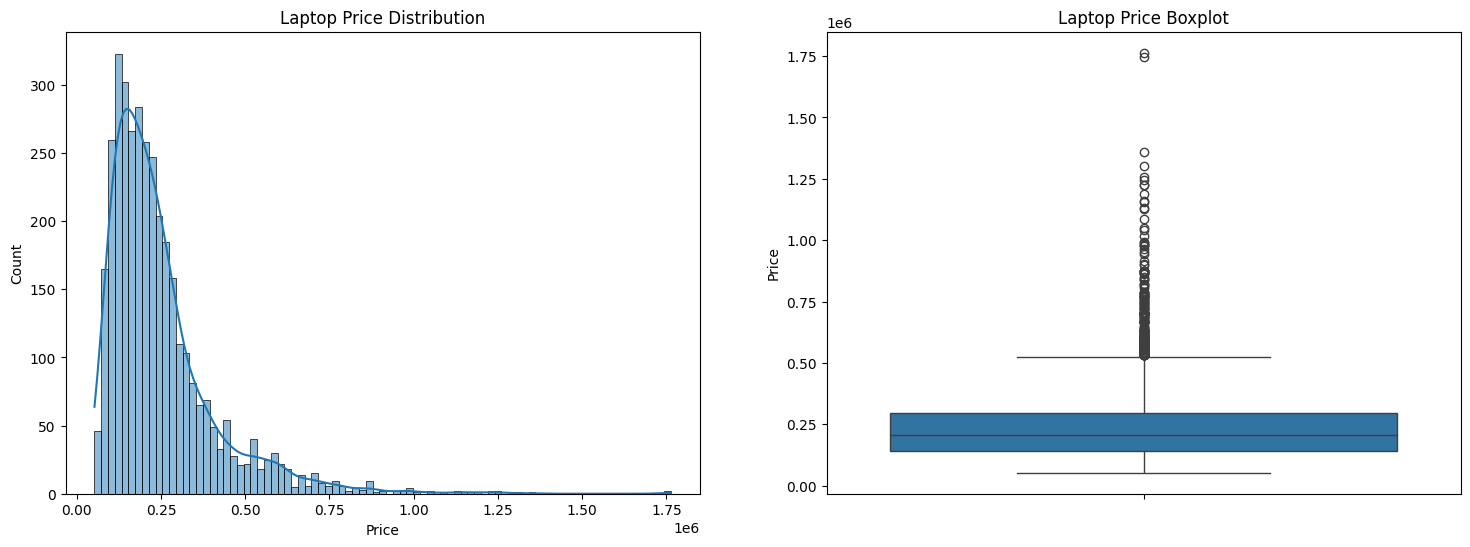

In [853]:
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Price')
plt.title('Laptop Price Boxplot')
plt.ylabel('Price')
plt.show()

## **Remove unnessary Colums**

In [854]:
cols_to_drop = [
    'Name','Processor_Name', 'Display_size(inch)','GPU',
    'Adapter', 'Battery_Life', 'Processor_Brand_Extracted'
]
# Drop columns
df = df.drop(columns=cols_to_drop)
# Check the updated DataFrame
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM_Size (GB),RAM_TYPE,Processer_speed,Display_type,GPU_Brand,SSD(GB),HDD(GB),Processor_Series,Processor_Tier,Operating_System,Display_Category,GPU_Tier
0,Lenovo,127011.5,AMD,Yes,8,DDR4,4.0,LCD,AMD,512,0,AMD Ryzen 5,Mid-End,Windows 11,Medium,Low-end
1,Dell,274750.0,Intel,Yes,16,DDR5,3.3,LCD,NVIDIA,512,0,Intel Core I5,Mid-End,Windows 11,Medium,Mid-end
2,HP,194215.0,Intel,Yes,8,DDR4,4.2,LCD,Intel,512,0,Intel Core I5,Mid-End,Windows 11,Medium,Entry-level
3,Other,76965.0,Intel,No,8,LPDDR4X,1.7,LCD,Intel,512,0,Intel Core I3,Low-End,Windows 11,Medium,Entry-level
4,HP,173596.5,AMD,Yes,8,DDR4,4.0,LCD,AMD,512,0,AMD Ryzen 5,Mid-End,Windows 11,Small,Low-end


In [855]:
df.shape

(3601, 16)

In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3601 entries, 0 to 3617
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Brand             3601 non-null   category
 1   Price             3601 non-null   float64 
 2   Processor_Brand   3601 non-null   object  
 3   RAM_Expandable    3601 non-null   object  
 4   RAM_Size (GB)     3601 non-null   int64   
 5   RAM_TYPE          3601 non-null   object  
 6   Processer_speed   3601 non-null   float64 
 7   Display_type      3601 non-null   category
 8   GPU_Brand         3601 non-null   object  
 9   SSD(GB)           3601 non-null   int64   
 10  HDD(GB)           3601 non-null   int64   
 11  Processor_Series  3601 non-null   object  
 12  Processor_Tier    3601 non-null   object  
 13  Operating_System  3601 non-null   object  
 14  Display_Category  3601 non-null   object  
 15  GPU_Tier          3601 non-null   object  
dtypes: category(2), float64(2), i

In [857]:
df.to_csv('cleaned_laptop_dataset.csv', index=False)